In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import  seaborn as sns

In [7]:
#csv file
gym = pd.read_csv("C:\\PYTHON Files\\powerlifting_dataset.csv")

In [9]:
#head()
gym.head()

,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg)
0,Jessica Wilson,46,59 kg,Bench Press,269
1,John Doe,60,83 kg,Bench Press,179
2,Emily Davis,41,105 kg,Bench Press,235
3,Emily Davis,33,66 kg,Squat,359
4,Laura Taylor,56,74 kg,Deadlift,221


In [11]:
#tail()
gym.tail()

,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg)
2995,John Doe,46,74 kg,Bench Press,246
2996,Daniel Lee,39,Open,Deadlift,244
2997,Sarah Thomas,62,Open,Squat,148
2998,Chris Brown,32,93 kg,Bench Press,333
2999,Daniel Lee,22,83 kg,Deadlift,280


In [13]:
#size
gym.size

15000

In [15]:
#shape
gym.shape

(3000, 5)

In [19]:
#describe
gym.describe()

,Age,Amount Lifted (kg)
count,3000.000000,3000.000000
mean,41.064000,250.332667
std,13.682628,86.281208
min,18.000000,100.000000
25%,29.000000,176.750000
50%,41.000000,250.000000
75%,53.000000,325.250000
max,64.000000,399.000000


In [21]:
#info
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Lifter Name         3000 non-null   object
 1   Age                 3000 non-null   int64 
 2   Weight Class        3000 non-null   object
 3   Lift Type           3000 non-null   object
 4   Amount Lifted (kg)  3000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 117.3+ KB


In [23]:
#isnull
gym.isnull().sum()

Lifter Name           0
Age                   0
Weight Class          0
Lift Type             0
Amount Lifted (kg)    0
dtype: int64

In [27]:
#columns
gym.columns

Index(['Lifter Name', 'Age', 'Weight Class', 'Lift Type',
       'Amount Lifted (kg)'],
      dtype='object')

C:\Users\kayah\AppData\Local\Temp\ipykernel_10076\831012362.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_lifters = gym.groupby('Lift Type').apply(lambda x: x.nlargest(10, 'Amount Lifted (kg)')).reset_index(drop = True) #used to avoid adding the old index as a new column in the DataFrame after resetting the index.


         Lifter Name  Age Weight Class    Lift Type  Amount Lifted (kg)
0    Michael Johnson   51        93 kg  Bench Press                 399
1         Jane Smith   57        74 kg  Bench Press                 399
2   Matthew Anderson   29        66 kg  Bench Press                 399
3        Emily Davis   48         Open  Bench Press                 399
4   Matthew Anderson   64        74 kg  Bench Press                 398
5       Sarah Thomas   63        59 kg  Bench Press                 398
6           John Doe   18        74 kg  Bench Press                 397
7         Jane Smith   48        83 kg  Bench Press                 397
8         Jane Smith   25         Open  Bench Press                 397
9         Daniel Lee   52        93 kg  Bench Press                 397
10        Jane Smith   58        74 kg     Deadlift                 399
11      Sarah Thomas   51        59 kg     Deadlift                 399
12       Chris Brown   39       120 kg     Deadlift             

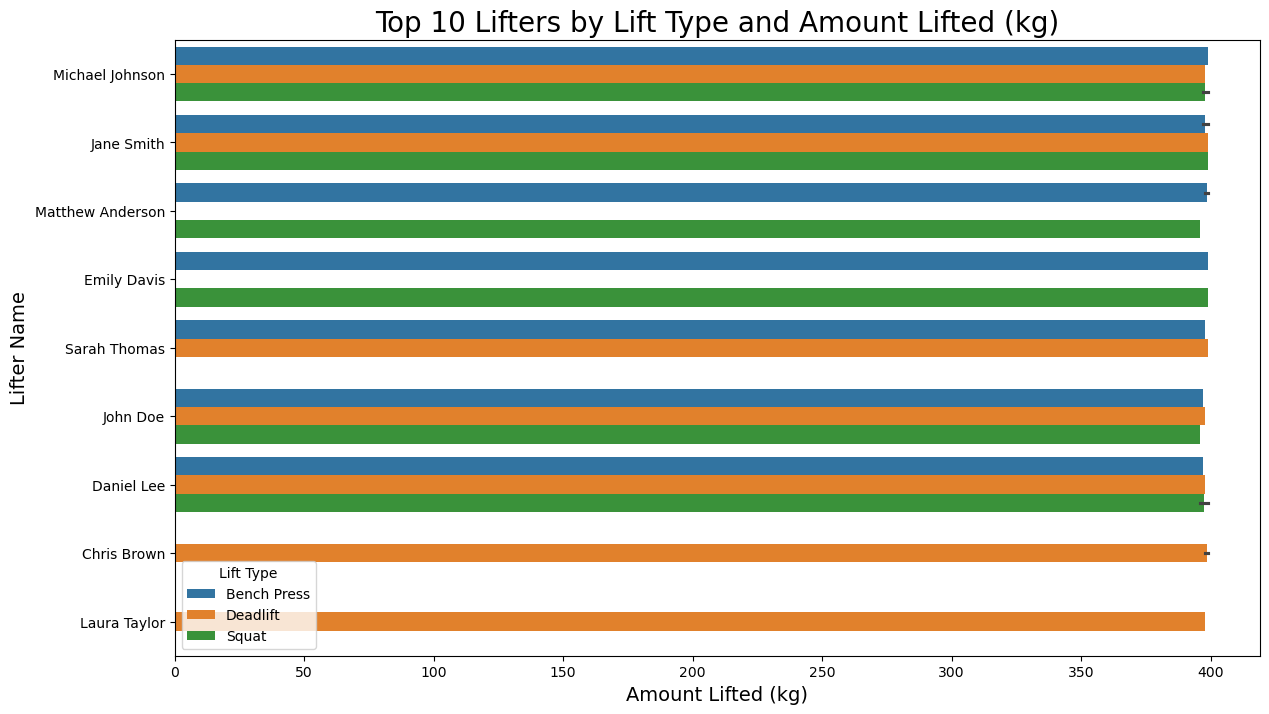

In [53]:
#1 top 10 lifters, highest amount lifted in each life type
# Get the top 10 lifters for each lift type
top_lifters = gym.groupby('Lift Type').apply(lambda x: x.nlargest(10, 'Amount Lifted (kg)')).reset_index(drop = True) #used to avoid adding the old index as a new column in the DataFrame after resetting the index.
                                                    #used to find the top 10 entries within each group.
# Display the result
print(top_lifters)

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Amount Lifted (kg)', y='Lifter Name', hue='Lift Type', data=top_lifters) #hue to add a third dimension to the data by color-coding different categories within a dataset.
plt.title('Top 10 Lifters by Lift Type and Amount Lifted (kg)', fontsize=20)
plt.xlabel('Amount Lifted (kg)', fontsize=14)
plt.ylabel('Lifter Name', fontsize=14)
plt.legend(title='Lift Type')
plt.show()

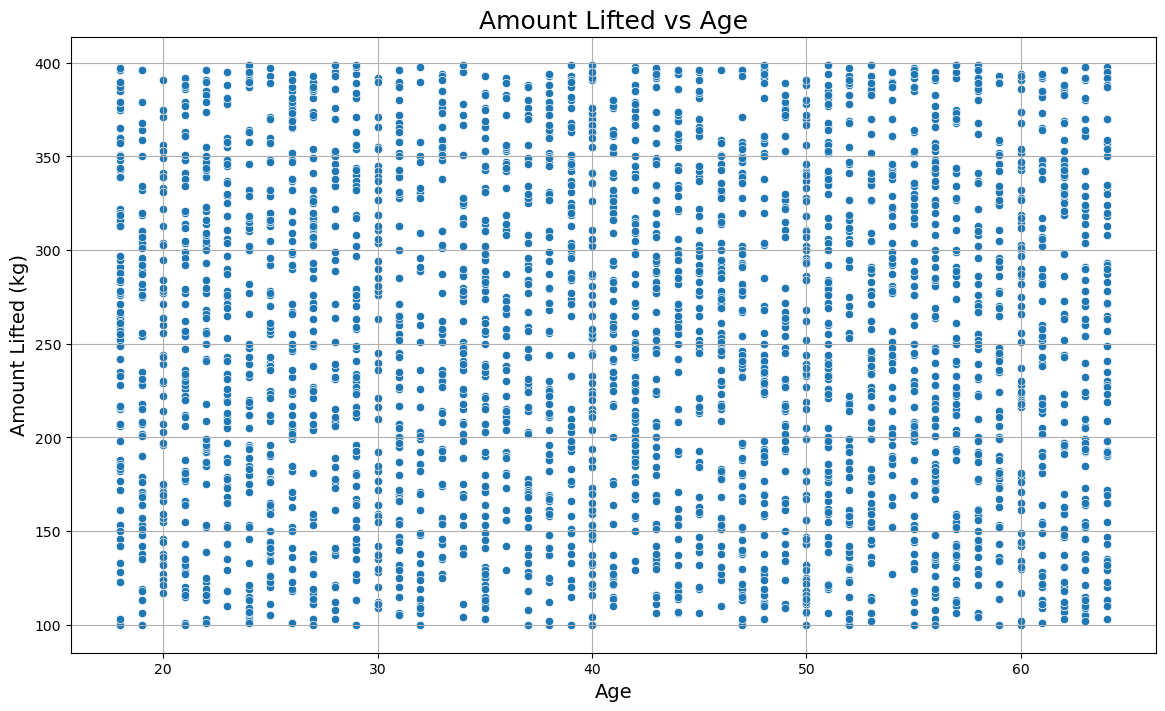

In [59]:
#2 amount lifted vary with age
# Create the scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Age', y='Amount Lifted (kg)', data=gym)

# Add titles and labels
plt.title('Amount Lifted vs Age', fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Amount Lifted (kg)', fontsize=14)
plt.grid()
plt.show()


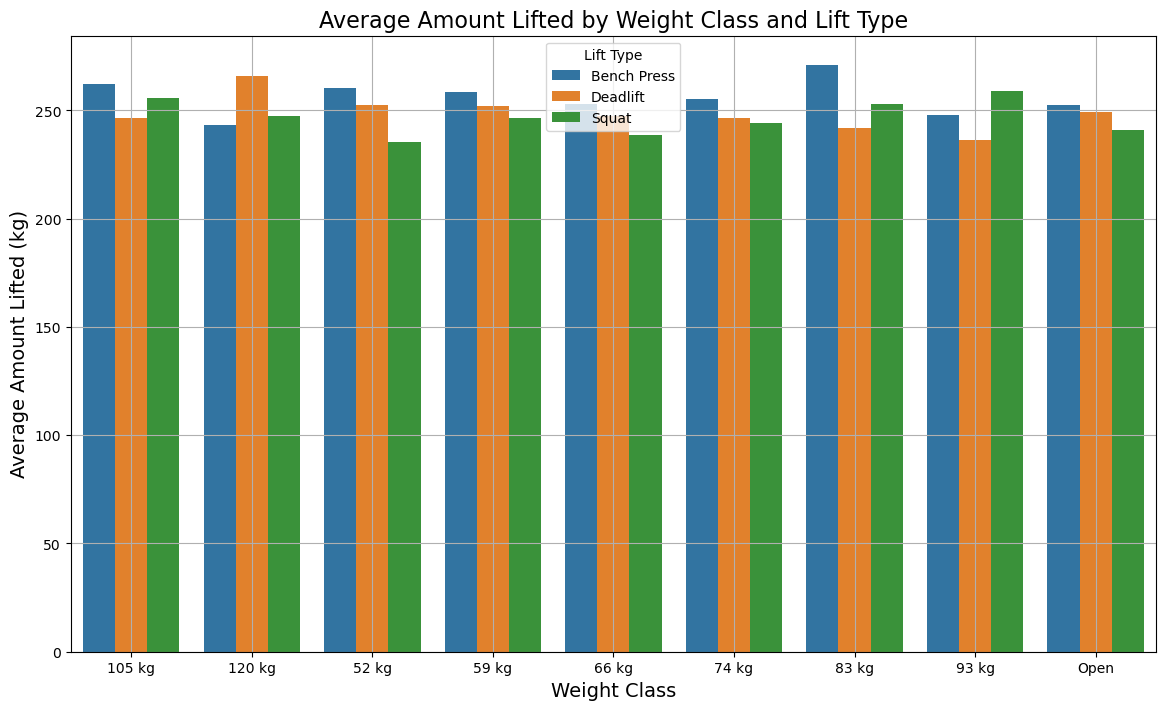

In [61]:
#3 lifters in different weight classes compare with lift type
# Calculate the average amount lifted by weight class and lift type
average_lift = gym.groupby(['Weight Class', 'Lift Type'])['Amount Lifted (kg)'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Weight Class', y='Amount Lifted (kg)', hue='Lift Type', data=average_lift)

# Add titles and labels
plt.title('Average Amount Lifted by Weight Class and Lift Type', fontsize=16)
plt.xlabel('Weight Class', fontsize=14)
plt.ylabel('Average Amount Lifted (kg)', fontsize=14)
plt.legend(title='Lift Type')
plt.grid()
plt.show()


C:\Users\kayah\AppData\Local\Temp\ipykernel_10076\640528361.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_lift_by_age = gym.groupby('Age Group')['Amount Lifted (kg)'].mean().reset_index()


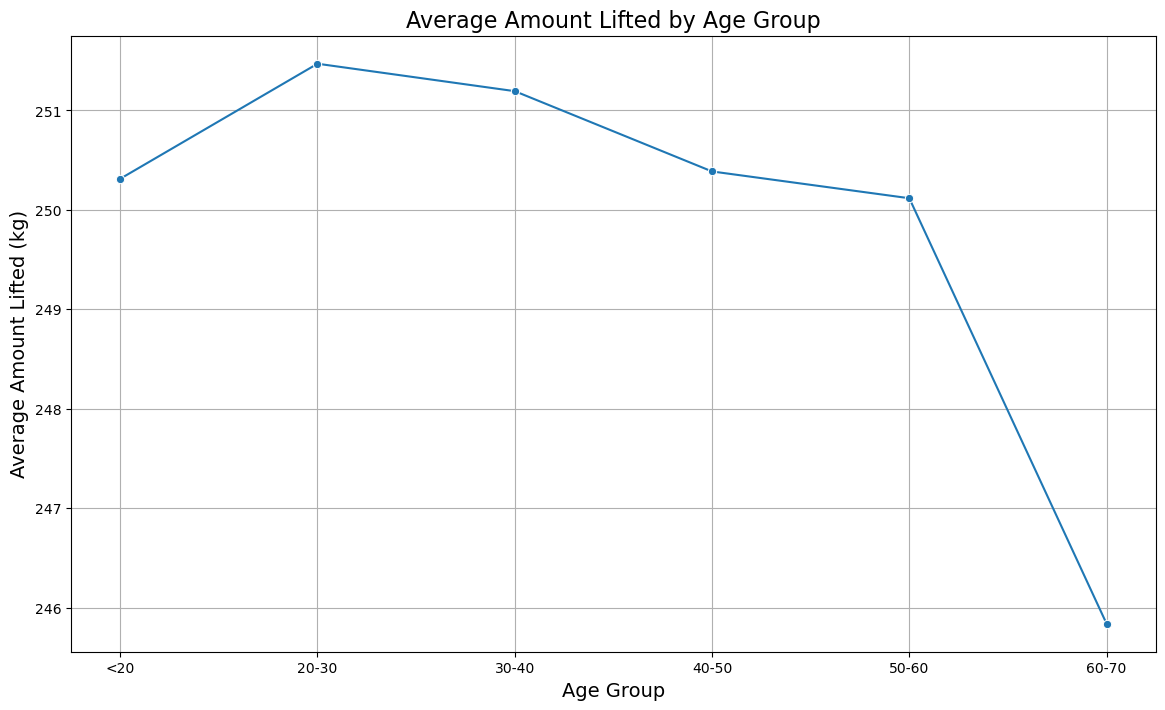

In [65]:
#4 different age groups in the amount lift
# Create age groups
bins = [0, 20, 30, 40, 50, 60, 70, 80]  # Define age bins
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']  # Labels for bins
gym['Age Group'] = pd.cut(gym['Age'], bins=bins, labels=labels)

# Calculate the average amount lifted by age group
average_lift_by_age = gym.groupby('Age Group')['Amount Lifted (kg)'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(14, 8))
sns.lineplot(x='Age Group', y='Amount Lifted (kg)', data=average_lift_by_age, marker='o')

# Add titles and labels
plt.title('Average Amount Lifted by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Amount Lifted (kg)', fontsize=14)
plt.grid()
plt.show()


       Lift Type      Lifter Name  Age  Amount Lifted (kg)
153  Bench Press     Sarah Thomas   18                 261
102     Deadlift  Michael Johnson   18                 206
315        Squat     Laura Taylor   18                 283


C:\Users\kayah\AppData\Local\Temp\ipykernel_10076\3952176450.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(data=youngest_lifters, x='Lift Type', y='Age', markers='o', scale=1.5, palette='viridis')
C:\Users\kayah\AppData\Local\Temp\ipykernel_10076\3952176450.py:16: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data=youngest_lifters, x='Lift Type', y='Age', markers='o', scale=1.5, palette='viridis')


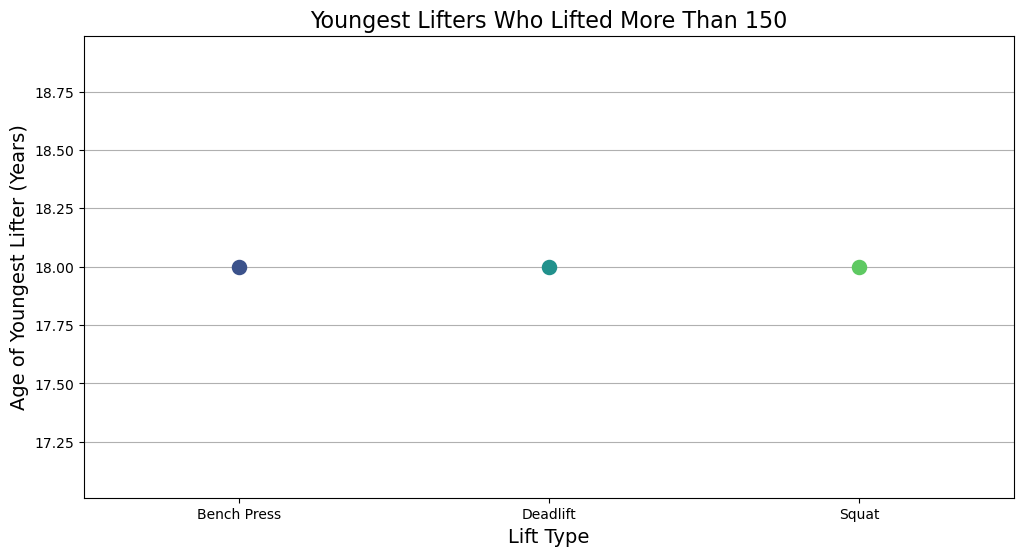

In [75]:
#5 youngest lifter
# Specify the amount fixed
fixed_amount = 150  

# Filter the dataset for each lift type where the amount lifted is greater than the specified fixed_amount
filtered_data = gym[gym['Amount Lifted (kg)'] > fixed_amount] 

# Find the youngest lifter for each lift type
youngest_lifters = filtered_data.loc[filtered_data.groupby('Lift Type')['Age'].idxmin()] #finds the index of the youngest lifter (the one with the minimum age) in that group.

# Display the result
print(youngest_lifters[['Lift Type', 'Lifter Name', 'Age', 'Amount Lifted (kg)']])

# Point Plot
plt.figure(figsize=(12, 6))
sns.pointplot(data=youngest_lifters, x='Lift Type', y='Age', markers='o', scale=1.5, palette='viridis')
plt.title('Youngest Lifters Who Lifted More Than 150', fontsize=16)
plt.xlabel('Lift Type', fontsize=14)
plt.ylabel('Age of Youngest Lifter (Years)', fontsize=14)
plt.grid(axis='y')
plt.show()


In [77]:
#6 specific age range from amount lifted
# Specify the age range
age_min = 20
age_max = 30

# Filter the dataset for lifters in the specified age range
age_filtered_data = gym[(gym['Age'] >= age_min) & (gym['Age'] <= age_max)]

# Calculate the average amount lifted in this age range
average_amount_lifted = age_filtered_data['Amount Lifted (kg)'].mean()

# Display the result
print(f"The average amount lifted by lifters aged {age_min}-{age_max} years is: {average_amount_lifted:.2f} kg")


The average amount lifted by lifters aged 20-30 years is: 250.47 kg
